In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [3]:
initial_df=pd.read_csv('healthcare-dataset-stroke-data.csv')
initial_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
initial_df=initial_df.drop('id', axis=1)
initial_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
initial_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
initial_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# # Best approach?
# initial_df['bmi']= initial_df['bmi'].fillna(0)
# Iris Approach
decision_tree_bmi = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])


In [9]:
X = initial_df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

# take out missing data (NaN)
Missing = X[X.bmi.isna()]

# taking whatever's not NaN and storing them in X
X = X[~X.bmi.isna()]

# Y is the bmi we have/ know
Y = X.pop('bmi')

# fit all the Xs and Ys one after the other and transform them!  
decision_tree_bmi.fit(X,Y)
# getting the predicted bmi values
predicted_bmi = pd.Series(decision_tree_bmi.predict(Missing[['age','gender']]),index=Missing.index)

# fill in the missing bmi data
initial_df.loc[Missing.index,'bmi'] = predicted_bmi

In [10]:
initial_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
stroke_info=initial_df['stroke']
print(f'Patients with strokes: {round(stroke_info.value_counts(normalize=True)[1]*100,2)}% --> ({stroke_info.value_counts()[1]} patients)')
print(f'Patients without strokes: {round(stroke_info.value_counts(normalize=True)[0]*100,2)}% --> ({stroke_info.value_counts()[0]} patients)')

Patients with strokes: 4.87% --> (249 patients)
Patients without strokes: 95.13% --> (4861 patients)


In [12]:
import plotly
import plotly.express as px
stroke_fig = px.histogram(initial_df, x="stroke", title='Stroke', width=500, height=500)
stroke_fig.show()


In [13]:
fig= px.pie(initial_df, names='stroke', color_discrete_sequence=['pink', 'green'])
fig.show()

In [14]:
# Split data into types
category_data= ['gender', 'hypertension', 'heart_disease', 'ever_married',
'work_type', 'Residence_type', 'smoking_status']

num_data = ['age','avg_glucose_level', 'bmi']

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>]],
      dtype=object)

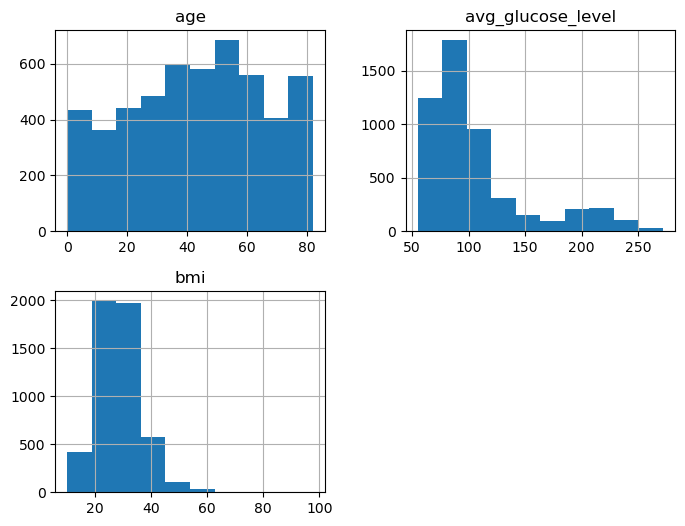

In [15]:
initial_df[num_data].hist(figsize=(8,6))

In [16]:
# Looking at individual variables in the data set
print(f'{initial_df["gender"].value_counts(normalize=True)}')
gender_fig=px.histogram(initial_df, x='gender', width=500, height=500)
gender_fig.show()

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64


In [17]:
print(f'{initial_df["heart_disease"].value_counts(normalize=True)}')
heart_fig=px.histogram(initial_df, x='heart_disease', width=500, height=500)
heart_fig.show()

0    0.945988
1    0.054012
Name: heart_disease, dtype: float64


In [18]:
print(f'{initial_df["hypertension"].value_counts(normalize=True)}')
htn_fig=px.histogram(initial_df, x='hypertension', width=500, height=500)
htn_fig.show()

0    0.902544
1    0.097456
Name: hypertension, dtype: float64


In [19]:
print(f'{initial_df["smoking_status"].value_counts(normalize=True)}')
smoke_fig=px.histogram(initial_df, x='smoking_status', width=500, height=500)
smoke_fig.show()

never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: smoking_status, dtype: float64


In [20]:
print(f'{initial_df["ever_married"].value_counts(normalize=True)}')
marry_fig=px.histogram(initial_df, x='ever_married', width=500, height=500)
marry_fig.show()

Yes    0.656164
No     0.343836
Name: ever_married, dtype: float64


In [21]:
print(f'{initial_df["Residence_type"].value_counts(normalize=True)}')
resident_fig=px.histogram(initial_df, x='Residence_type', width=500, height=500)
resident_fig.show()

Urban    0.508023
Rural    0.491977
Name: Residence_type, dtype: float64


In [22]:
print(f'{initial_df["work_type"].value_counts(normalize=True)}')
work_fig=px.histogram(initial_df, x='work_type', width=500, height=500)
work_fig.show()

Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: work_type, dtype: float64


Looking at variables in relation to stroke
* Do this by looking at %s when a variable is true (==1) 

In [23]:
# Gender
print (f'Men have a {round(initial_df[initial_df["gender"]=="Male"]["stroke"].mean()*100,2)}% chance of having a stroke')
print (f'Females have a {round(initial_df[initial_df["gender"]=="Female"]["stroke"].mean()*100,2)}% chance of having a stroke')

Men have a 5.11% chance of having a stroke
Females have a 4.71% chance of having a stroke


In [24]:
# Heart Disease
print (f'A person with CV issues has a {round(initial_df[initial_df["heart_disease"]==1]["stroke"].mean()*100,2)}% chance of having a stroke')
print (f'A person without CV issues has a {round(initial_df[initial_df["heart_disease"]==0]["stroke"].mean()*100,2)}% chance of having a stroke')

A person with CV issues has a 17.03% chance of having a stroke
A person without CV issues has a 4.18% chance of having a stroke


In [25]:
# HTN
print (f'A person with HTN has a {round(initial_df[initial_df["hypertension"]==1]["stroke"].mean()*100,2)}% chance of having a stroke')
print (f'A person without HTN has a {round(initial_df[initial_df["hypertension"]==0]["stroke"].mean()*100,2)}% chance of having a stroke')

A person with HTN has a 13.25% chance of having a stroke
A person without HTN has a 3.97% chance of having a stroke


In [26]:
# Smoking 
print (f'Someone who has never smoked has a {round(initial_df[initial_df["smoking_status"]=="never smoked"]["stroke"].mean()*100,2)}% chance of having a stroke')

print (f'Former smokers have a {round(initial_df[initial_df["smoking_status"]=="formerly smoked"]["stroke"].mean()*100,2)}% chance of having a stroke')

print (f'Smokers have a {round(initial_df[initial_df["smoking_status"]=="smokes"]["stroke"].mean()*100,2)}% chance of having a stroke')

print (f'People with unknown smoking status have a {round(initial_df[initial_df["smoking_status"]=="Unknown"]["stroke"].mean()*100,2)}% chance of having a stroke')


Someone who has never smoked has a 4.76% chance of having a stroke
Former smokers have a 7.91% chance of having a stroke
Smokers have a 5.32% chance of having a stroke
People with unknown smoking status have a 3.04% chance of having a stroke


In [27]:
# Smoking 
print (f'Someone who has never smoked has a {round(initial_df[initial_df["smoking_status"]=="never smoked"]["heart_disease"].mean()*100,2)}% chance of having a stroke')

print (f'Former smokers have a {round(initial_df[initial_df["smoking_status"]=="formerly smoked"]["stroke"].mean()*100,2)}% chance of having a stroke')

print (f'Smokers have a {round(initial_df[initial_df["smoking_status"]=="smokes"]["stroke"].mean()*100,2)}% chance of having a stroke')

print (f'People with unknown smoking status have a {round(initial_df[initial_df["smoking_status"]=="Unknown"]["stroke"].mean()*100,2)}% chance of having a stroke')

Someone who has never smoked has a 4.76% chance of having a stroke
Former smokers have a 7.91% chance of having a stroke
Smokers have a 5.32% chance of having a stroke
People with unknown smoking status have a 3.04% chance of having a stroke


In [28]:
print (f'An individual who has been married at some point in their life has a {round(initial_df[initial_df["ever_married"]=="Yes"]["stroke"].mean()*100,2)}% chance of having a stroke')

print (f'An individual who has never been married {round(initial_df[initial_df["ever_married"]=="No"]["stroke"].mean()*100,2)}% chance of having a stroke')

An individual who has been married at some point in their life has a 6.56% chance of having a stroke
An individual who has never been married 1.65% chance of having a stroke


In [29]:
print (f'Urban-dwellers has a {round(initial_df[initial_df["Residence_type"]=="Urban"]["stroke"].mean()*100,2)}% chance of having a stroke')

print (f'Rural-dwellers has a {round(initial_df[initial_df["Residence_type"]=="Rural"]["stroke"].mean()*100,2)}% chance of having a stroke')


Urban-dwellers has a 5.2% chance of having a stroke
Rural-dwellers has a 4.53% chance of having a stroke


In [30]:
print (f'Individuals in the private-sector have a {round(initial_df[initial_df["work_type"]=="Private"]["stroke"].mean()*100,2)}% chance of having a stroke')

print (f'Self-employed individuals have a {round(initial_df[initial_df["work_type"]=="Self-employed"]["stroke"].mean()*100,2)}% chance of having a stroke')

print (f'Individuals working for the government have a {round(initial_df[initial_df["work_type"]=="Govt_job"]["stroke"].mean()*100,2)}% chance of having a stroke')

print (f'Children have a {round(initial_df[initial_df["work_type"]=="children"]["stroke"].mean()*100,2)}% chance of having a stroke')

print (f'Someone who has never worked has a {round(initial_df[initial_df["work_type"]=="Never_worked"]["stroke"].mean()*100,2)}% chance of having a stroke')

Individuals in the private-sector have a 5.09% chance of having a stroke
Self-employed individuals have a 7.94% chance of having a stroke
Individuals working for the government have a 5.02% chance of having a stroke
Children have a 0.29% chance of having a stroke
Someone who has never worked has a 0.0% chance of having a stroke


In [31]:
# Seaborn Plots
stroke_df=initial_df[initial_df['stroke']==1]
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.879487,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<AxesSubplot:xlabel='age', ylabel='Count'>

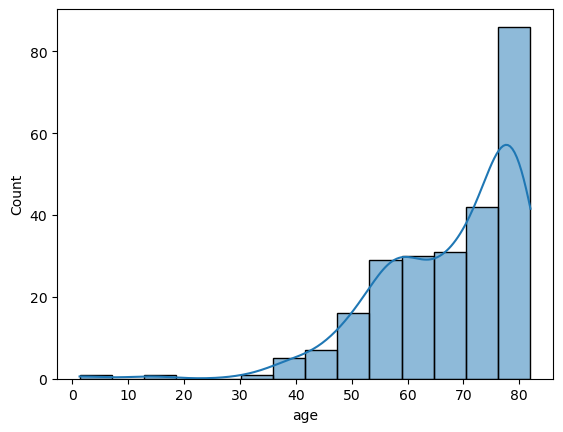

In [32]:
# Histogram stroke age
sns.histplot(stroke_df['age'], kde= True)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

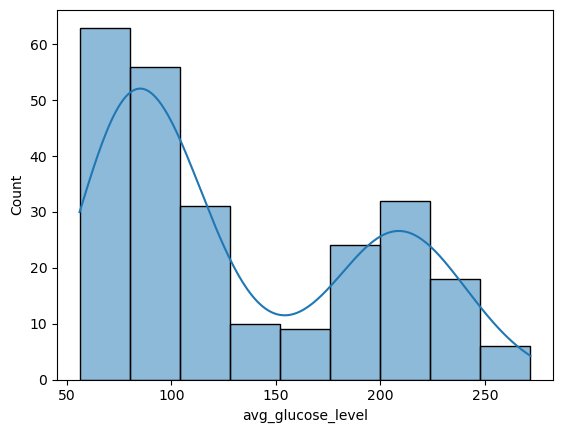

In [33]:
# Histogram stroke & glucose
sns.histplot(stroke_df['avg_glucose_level'], kde= True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

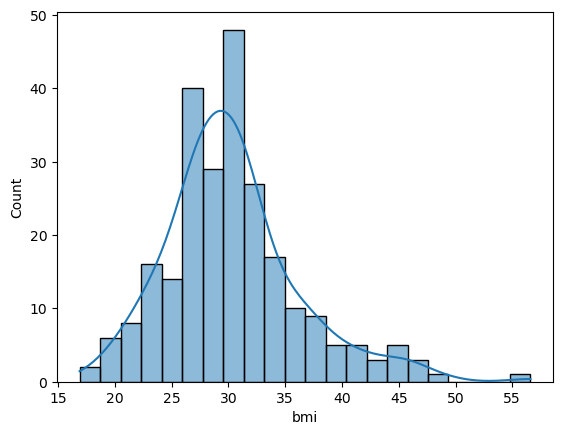

In [34]:
sns.histplot(stroke_df['bmi'], kde= True)

In [35]:
healthy_df=initial_df[initial_df['stroke']==0]

<AxesSubplot:xlabel='age', ylabel='Count'>

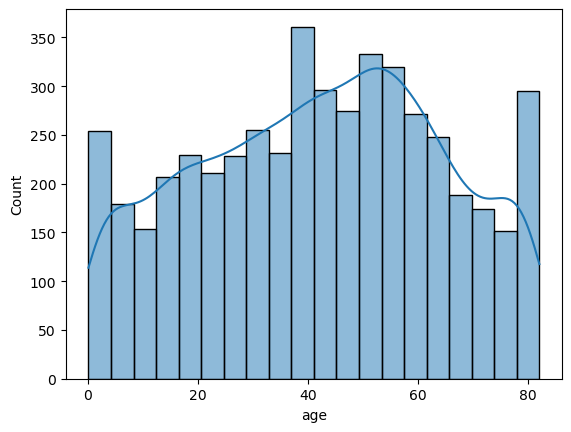

In [36]:
sns.histplot(healthy_df['age'], kde= True)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

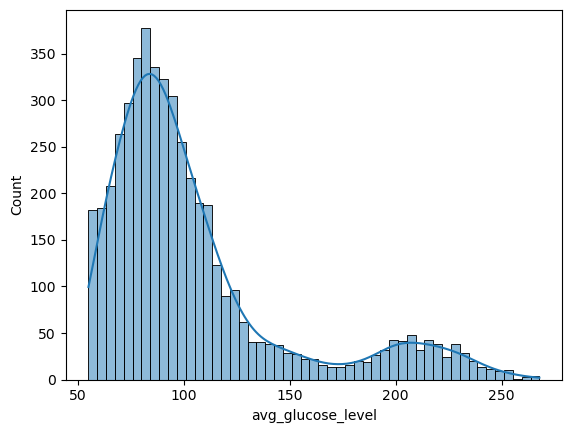

In [37]:
sns.histplot(healthy_df['avg_glucose_level'], kde= True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

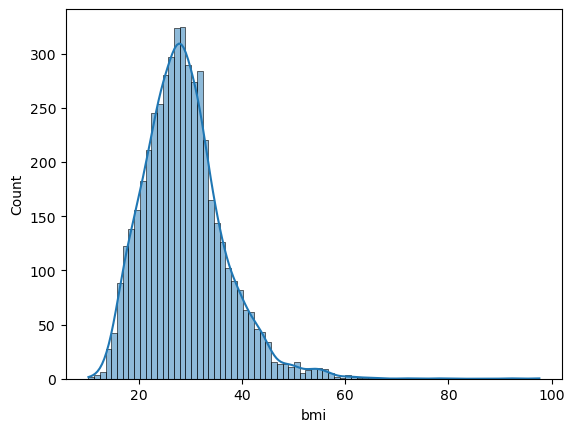

In [38]:
sns.histplot(healthy_df['bmi'], kde= True)

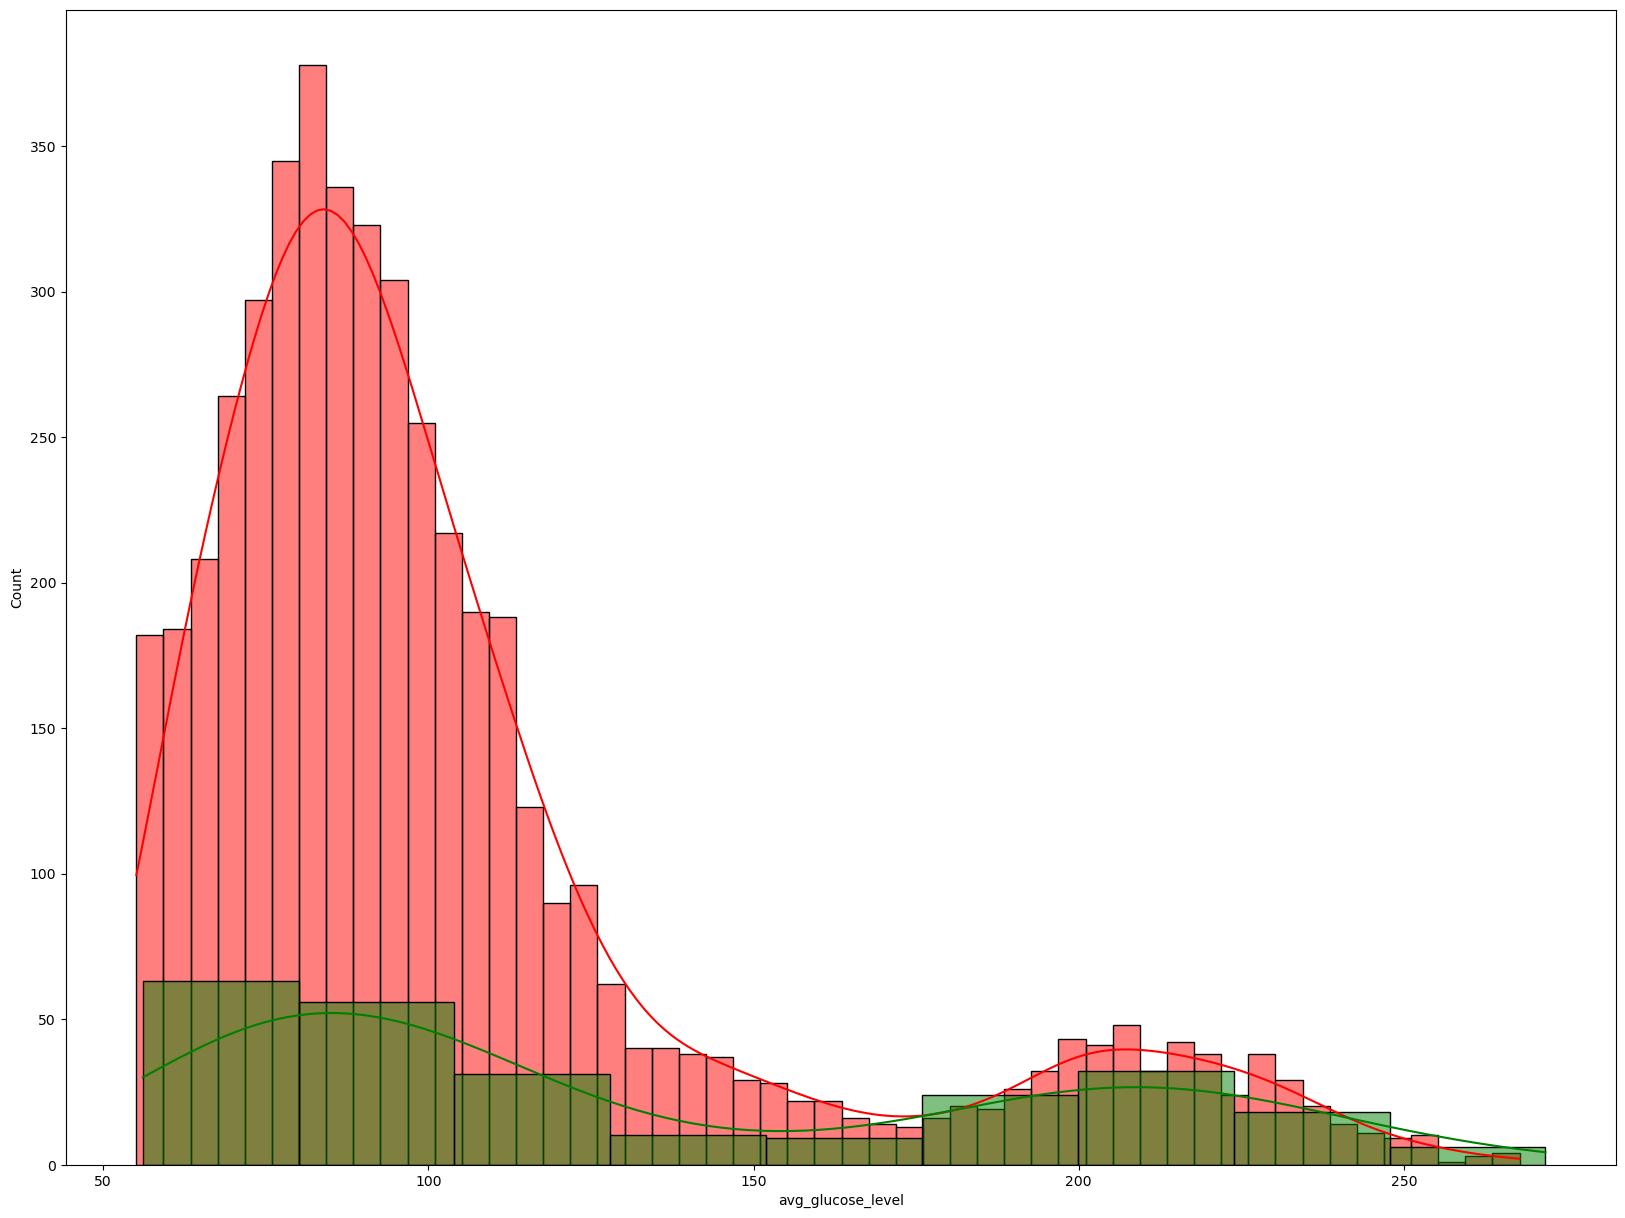

In [39]:
# Overlayed for stroke cases in relation to blood sugar 
fig, ax= plt.subplots(figsize= (20,15))
sns.histplot(x=healthy_df['avg_glucose_level'], kde= True, ax=ax, color='red')
sns.histplot(x=stroke_df['avg_glucose_level'], kde= True, ax=ax, color='green')
plt.show()

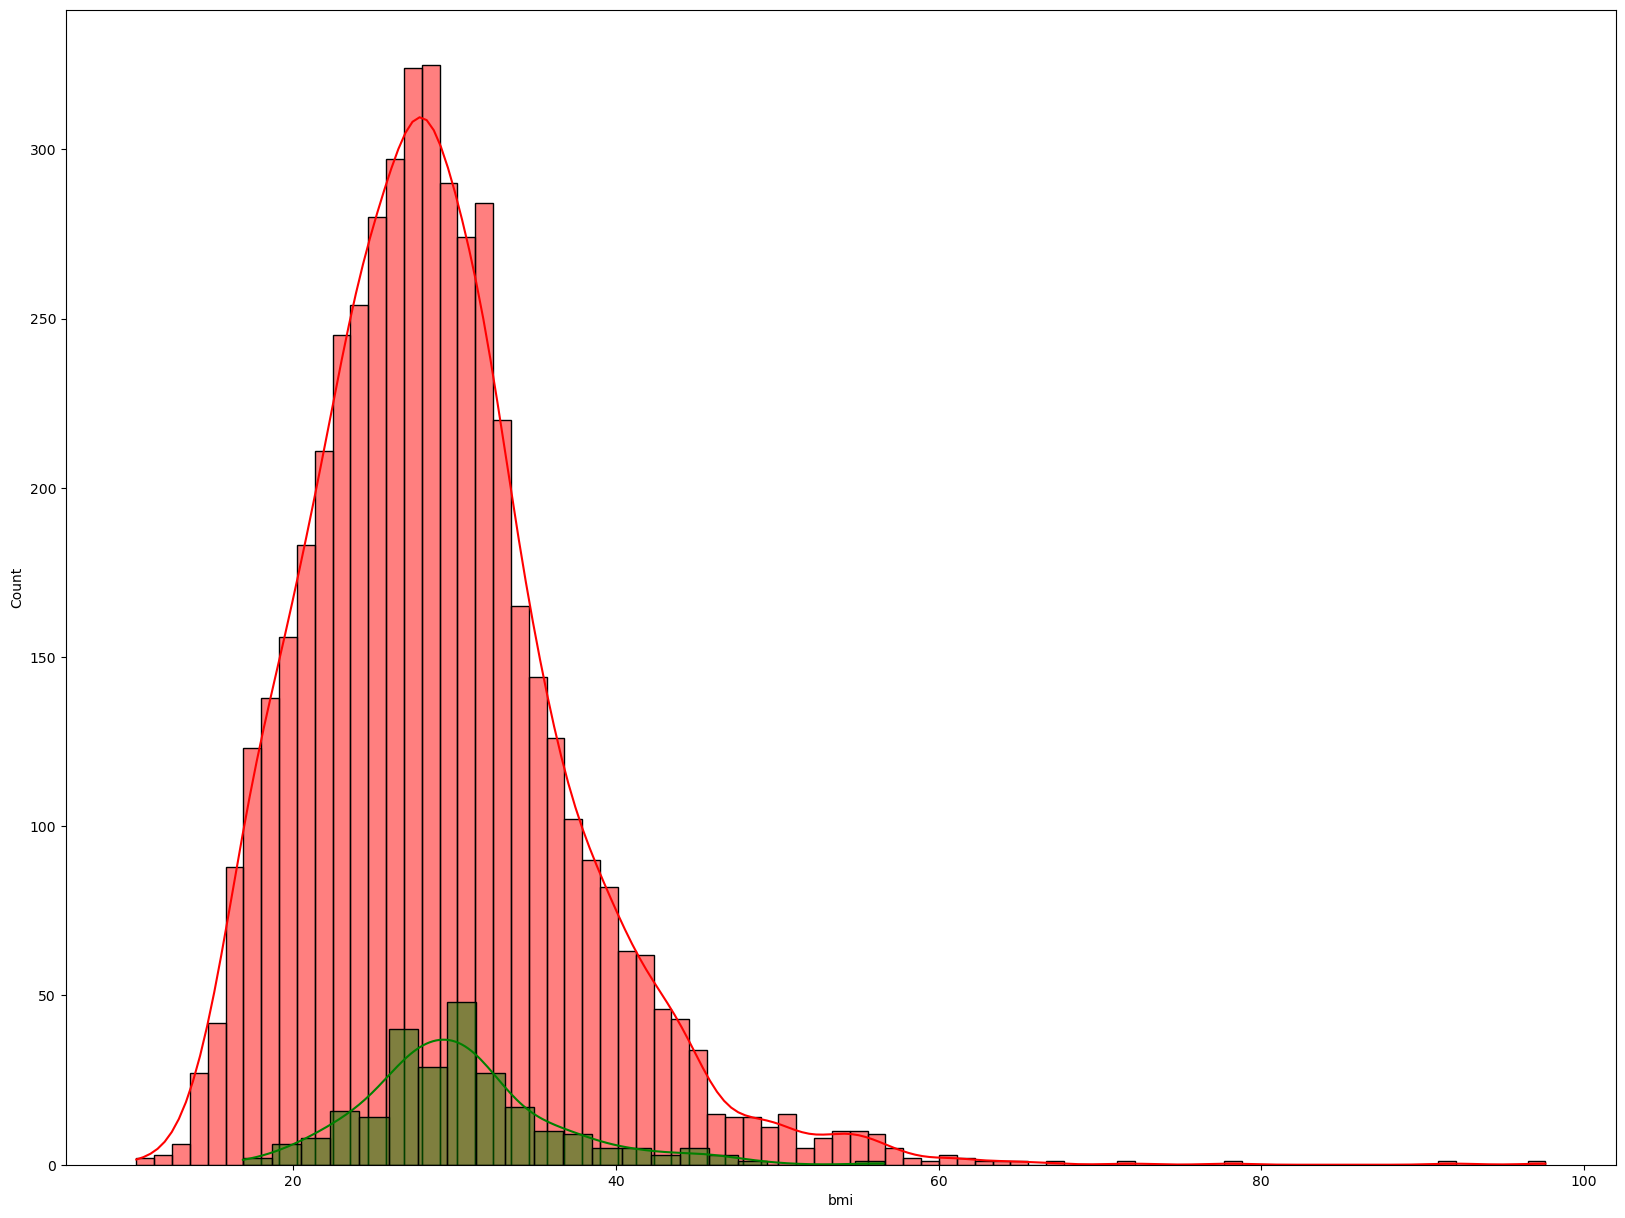

In [40]:
fig, ax= plt.subplots(figsize= (20,15))
sns.histplot(x=healthy_df['bmi'], kde= True, ax=ax, color='red')
sns.histplot(x=stroke_df['bmi'], kde= True, ax=ax, color='green')
plt.show()

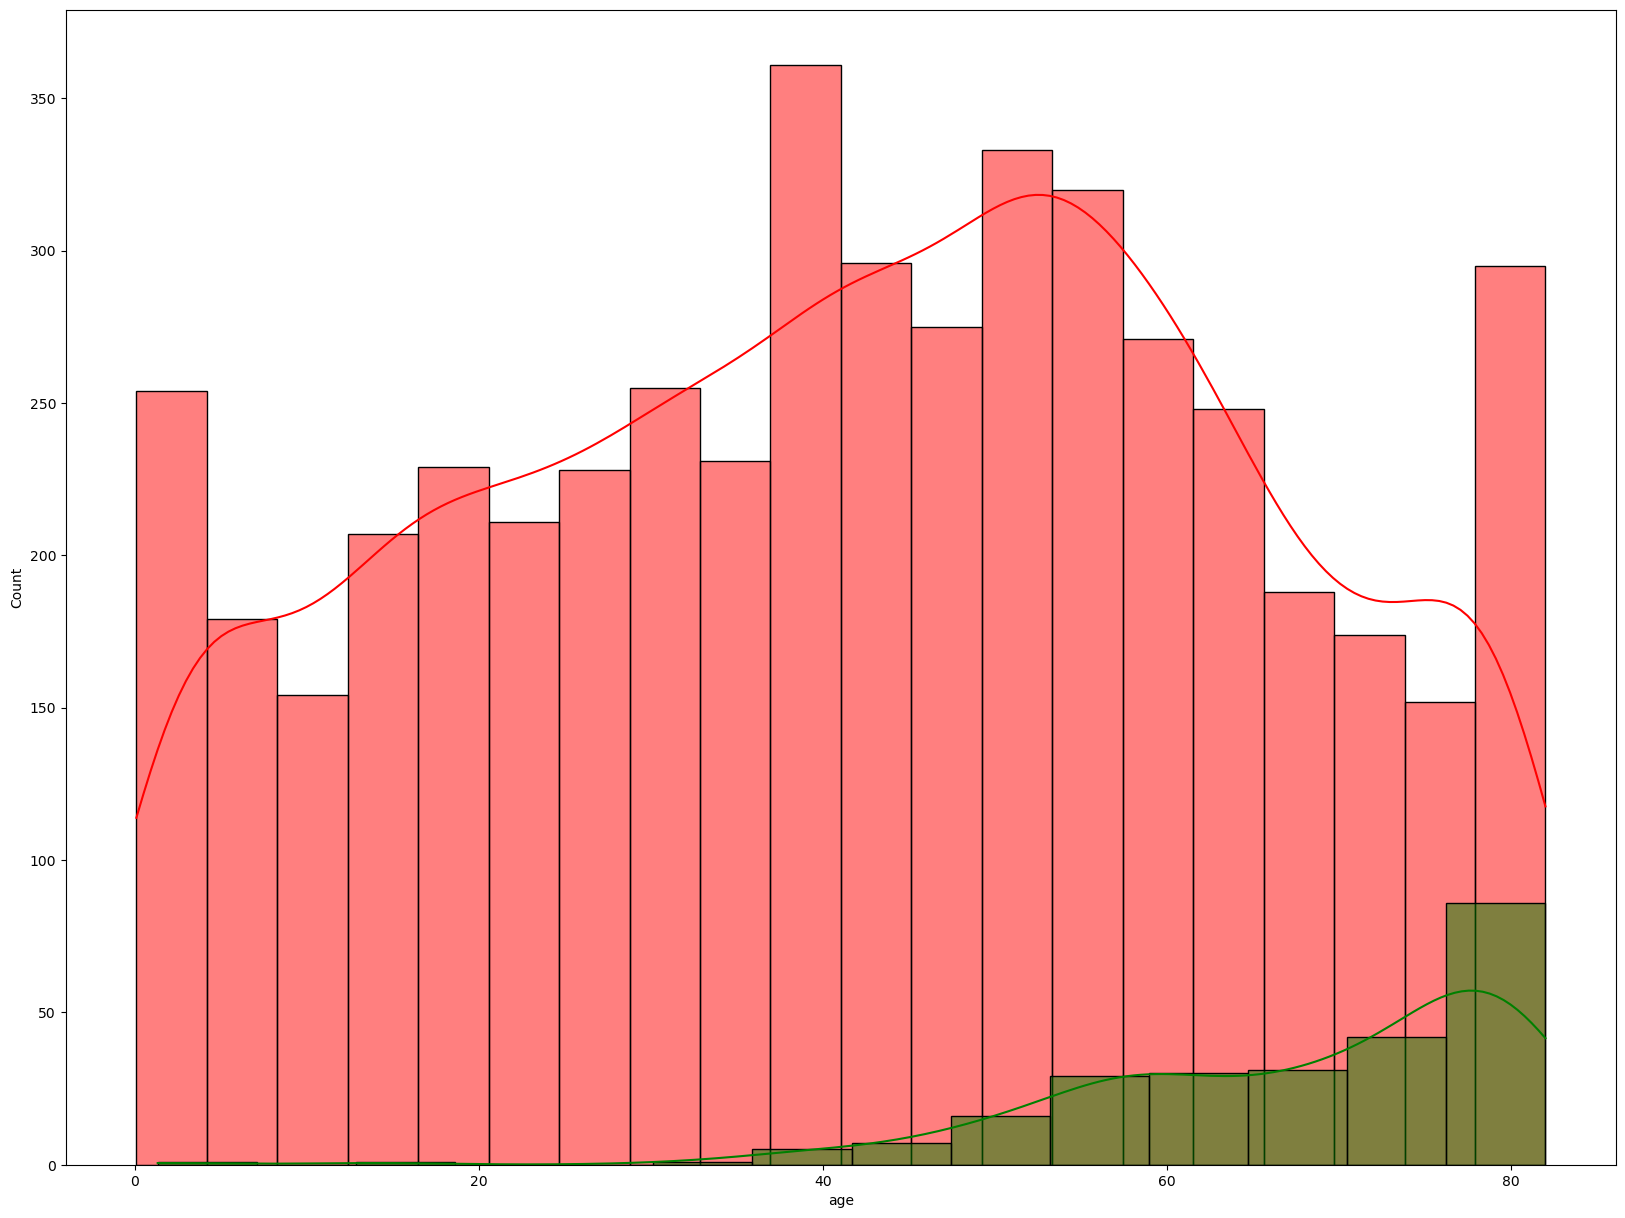

In [41]:
fig, ax= plt.subplots(figsize= (20,15))
sns.histplot(x=healthy_df['age'], kde= True, ax=ax, color='red')
sns.histplot(x=stroke_df['age'], kde= True, ax=ax, color='green')
plt.show()

In [42]:
corr=initial_df.corr()['stroke'].sort_values(ascending=False)


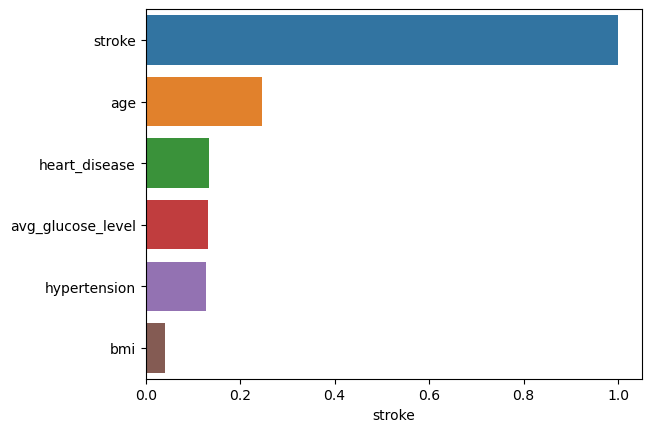

In [43]:
sns.barplot(x=corr, y=corr.index)
plt.show()